In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

C:\Users\GUR47935\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Data Ingestion

In [2]:
# Reading the csv file
df = pd.read_csv('homework_data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


### Data Preperation

In [3]:
# Looking at columns name
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [4]:
# List of columns suggested for homework
columns = ['Make', 'Model', 'Year', 'Engine HP', 'Engine Cylinders', 'Transmission Type', 'Vehicle Size', 'highway MPG',  'city mpg', 'MSRP']

In [5]:
# Filtering suggested columns
df = df[columns]
df.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Size,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Compact,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Compact,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Compact,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Compact,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Compact,28,18,34500


In [6]:
# Converting column names into snake case form
df.columns = df.columns.str.replace(' ', '_').str.lower()
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_size,highway_mpg,city_mpg,msrp
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Compact,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Compact,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Compact,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Compact,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Compact,28,18,34500


In [7]:
# Renaming msrp to price
df = df.rename(columns={'msrp': 'price'})
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_size,highway_mpg,city_mpg,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Compact,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Compact,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Compact,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Compact,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Compact,28,18,34500


In [8]:
# Checking data types of columns
df.dtypes

make                  object
model                 object
year                   int64
engine_hp            float64
engine_cylinders     float64
transmission_type     object
vehicle_size          object
highway_mpg            int64
city_mpg               int64
price                  int64
dtype: object

In [9]:
# Checking null values
df.isnull().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_size          0
highway_mpg           0
city_mpg              0
price                 0
dtype: int64

In [10]:
# Filling null values with 0
df = df.fillna(0)
df.isnull().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_size         0
highway_mpg          0
city_mpg             0
price                0
dtype: int64

### Make `price` binary
- Now we need to turn the `price` variable from numeric into a binary format.
- Let's create a variable `above_average` which is `1` if the price is above its mean value and `0` otherwise..

In [11]:
mean_price = df.price.mean()
df['above_average'] = (df['price'] > mean_price).astype(int)
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_size,highway_mpg,city_mpg,price,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Compact,26,19,46135,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Compact,28,19,40650,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Compact,28,20,36350,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Compact,28,18,29450,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Compact,28,18,34500,0


### Split the data

- Split your data in train/val/test sets with 60%/20%/20% distribution.
- Use Scikit-Learn for that (the `train_test_split` function) and set the seed to `1`.
- Make sure that the target value (`above_average`) is not in your dataframe.e.

In [12]:
# Splitting into train_full and test dataset
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)

# Splitting into train and val dataset
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=1)

df_train.shape, df_val.shape, df_test.shape

((7148, 11), (2383, 11), (2383, 11))

In [13]:
# Restting the index
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [14]:
# Target variable
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

In [15]:
# Deleting target from X
del df_train['above_average']
del df_val['above_average']
del df_test['above_average']

### Question 1: ROC AUC feature importance

ROC AUC could also be used to evaluate feature importance of numerical variables.

In [16]:
# Initialize an empty dictionary to store AUC values
auc_scores = {}

# Iterate over each numerical variable to compute AUC
for col in ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']:
    auc = roc_auc_score(y_train, df_train[col])
    
    # If AUC < 0.5, negate the variable and recompute AUC
    if auc < 0.5:
        auc = roc_auc_score(y_train, -df_train[col])
    
    # Store the computed AUC in the dictionary
    auc_scores[col] = auc

# Find the numerical variable with the highest AUC
max(auc_scores, key=auc_scores.get)

'engine_hp'

### Question 2: Training the model

Apply one-hot-encoding using `DictVectorizer` and train the logistic regression with these parameters:

```bash
LogisticRegression(solver='liblinear', C=1.0, max_iter=1000) 
```

What's the AUC of this model on the validation dataset? (round to 3 digits)

In [17]:
categorical = ['make', 'model', 'year', 'transmission_type', 'vehicle_size']
numerical = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']

In [18]:
# Defining DictVectorizer
dv = DictVectorizer(sparse=False)

# Traning dataset
train_dicts = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

# Validation dataset
val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

X_train.shape, X_val.shape

((7148, 941), (2383, 941))

In [19]:
y_train.shape, y_val.shape

((7148,), (2383,))

In [20]:
# Training the model
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000).fit(X_train, y_train)

In [21]:
# Soft prediction
y_pred = model.predict_proba(X_val)[:, 1]
above_average_prediction = (y_pred >= 0.5)
(above_average_prediction == y_val).mean()

0.9357952161141418

In [22]:
# Calculating roc_auc_score
roc_auc_score(y_val, y_pred).round(3)

0.979

### Question 3: Precision and Recall
Now let's compute precision and recall for our model.

- Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
- For each threshold, compute precision and recall
- Plot them

At which threshold precision and recall curves intersect?

In [23]:
scores = []
thresholds = np.linspace(0, 1, 101 )

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)

    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (actual_positive & predict_positive).sum()
    fp = (actual_negative & predict_positive).sum()
    tn = (actual_negative & predict_negative).sum()
    fn = (actual_positive & predict_negative).sum()

    p = tp / (tp + fp)
    r = tp / (tp + fn)

    scores.append((t, p, r))

columns = ['threshold', 'precision', 'recall']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,threshold,precision,recall
0,0.00,0.274444,1.000000
1,0.01,0.447495,0.996942
2,0.02,0.489122,0.996942
3,0.03,0.519936,0.996942
4,0.04,0.547439,0.996942


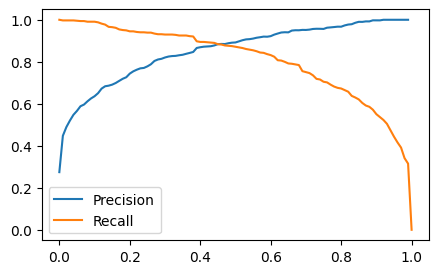

In [24]:
# Plotting the graph
plt.figure(figsize=(5, 3))
plt.plot(df_scores.threshold, df_scores.precision, label='Precision')
plt.plot(df_scores.threshold, df_scores.recall, label='Recall')
plt.legend()
plt.show()

**Observation:** At 0.48 threshold value precision and recall curves are intersecting.

### Question 4: F1 score

At which threshold F1 is maximal?

In [25]:
scores = []
thresholds = np.linspace(0, 1, 101 )

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)

    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (actual_positive & predict_positive).sum()
    fp = (actual_negative & predict_positive).sum()
    tn = (actual_negative & predict_negative).sum()
    fn = (actual_positive & predict_negative).sum()

    p = tp / (tp + fp)
    r = tp / (tp + fn)
    f1 = 2*p*r / (p+r)

    scores.append((t, p, r, f1))

columns = ['threshold', 'precision', 'recall', 'f1_score']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,threshold,precision,recall,f1_score
0,0.00,0.274444,1.000000,0.430688
1,0.01,0.447495,0.996942,0.617717
2,0.02,0.489122,0.996942,0.656266
3,0.03,0.519936,0.996942,0.683438
4,0.04,0.547439,0.996942,0.706775


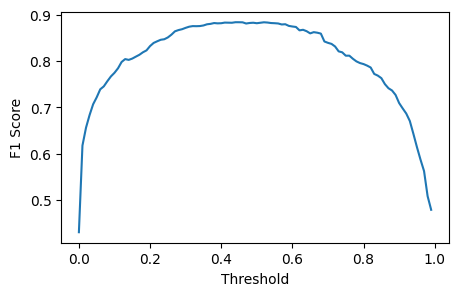

In [26]:
# Plotting the graph
plt.figure(figsize=(5, 3))
plt.plot(df_scores.threshold, df_scores.f1_score, label='F1 Score')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.show()

**Observation:** At 0.52 threshold value F1 score is maximal.

### Question 5: 5-Fold CV

Use the KFold class from Scikit-Learn to evaluate our model on 5 different folds:
```bash
    
KFold(n_splits=5, shuffle=True, random_state=      
    
```  

1) Iterate over different folds of df_full_train 
2) Split the data into train and validation
3) Train the model on train with these parameters: `LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)`
4) Use AUC to evaluate the model on validation  



dation
How large is standard devidation of the scores across different folds?

In [27]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [28]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [29]:
scores = []

kfold = KFold(n_splits=5, shuffle=True, random_state=1)

for train_idx, val_idx in kfold.split(df_train_full):
    df_train = df_train_full.iloc[train_idx]
    df_val = df_train_full.iloc[val_idx]

    y_train = df_train.above_average.values
    y_val = df_val.above_average.values

    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

In [30]:
# Std deviaation of score
np.std(scores)

0.001657117769721507

### Question 6: Hyperparemeter Tuning
Now let's use 5-Fold cross-validation to find the best parameter `C`

- Iterate over the following C values: `[0.01, 0.1, 0.5, 10]`
- Initialize `KFold` with the same parameters as previously
- Use these parametes for the model: `LogisticRegression(solver='liblinear', C=C, max_iter=1000)`
- Compute the mean score as well as the std (round the mean and std to 3 decimal digits)


Which `C` leads to the best mean score?

In [31]:
n_splits = 5

for C in tqdm([0.01, 0.1, 0.5, 10]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_train_full):
        df_train = df_train_full.iloc[train_idx]
        df_val = df_train_full.iloc[val_idx]

        y_train = df_train.above_average.values
        y_val = df_val.above_average.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

 25%|██▌       | 1/4 [00:01<00:03,  1.11s/it]

C=0.01 0.947 +- 0.002


 50%|█████     | 2/4 [00:02<00:02,  1.11s/it]

C=0.1 0.969 +- 0.002


 75%|███████▌  | 3/4 [00:03<00:01,  1.13s/it]

C=0.5 0.977 +- 0.003


100%|██████████| 4/4 [00:04<00:00,  1.14s/it]

C=10 0.980 +- 0.004


**Observation:** C=10 leads to best mean scores.